# In Drive Coupon Recommendation
---

## Problem Statement
---

This data was collected via a survey on the Ecom website Mechanical Turk. The survey describes different driving scenarios including the user’s destination, current time, weather, passenger, coupon attributes, user attributes, and contextual attributes, and then asks the user whether he/she will accept the coupon or not. In this project we have to predict if the user will accept the coupon.


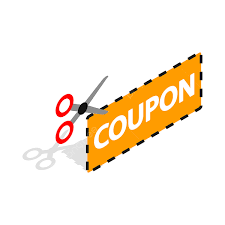

## Data Dictionary

1. Gender: Female, Male
2. Age: 21, 46, 26, 31, 41, 50plus, 36, below21
3. Marital Status: Unmarried partner, Single, Married partner, Divorced, Widowed
4. has_Children: 1: has children, 0: No children
5. Education: Some colleges — no degree, bachelor’s degree, Associates degree, High School Graduate, Graduate degree (Master or Doctorate), Some High School
6. Occupation: Traveller’s occupation 
7. Income: income of the traveler
8. Car: Description of vehicle driven by the traveller
9. Bar: how many times does the traveler go to a bar every month? 
10. Coffee House: how many times does the user go to a coffeehouse every month?
11. Carry Away: how many times does the user get takeaway food every month?
12. RestaurantLessThan20: how many times does the user go to a restaurant with an average expense per person of less than \$20 every month?
13. Restaurant20To50: how many times does the user go to a restaurant with an average expense per person of \$20 — \$50 every month
14. Destination: destination of traveler
15. Passenger: who are the passengers in the car 
16. Weather: weather when the user is driving (Sunny, Rainy, Snowy)
17. Temperature: temperature in Fahrenheit when the user is driving 
18. Cupon: Type of Cupon
19. Expiration: Validity of Cupon
20. toCoupon_GEQ5min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 5 minutes (0,1)
21. toCoupon_GEQ15min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 15 minutes (0,1)
22. toCoupon_GEQ25min: driving distance to the restaurant/cafe/bar for using the coupon is greater than 25 minutes (0,1)
23. direction_same: whether the restaurant/cafe/bar is in the same direction as the traveler’s current destination (0,1)
24. direction_opp: whether the restaurant/cafe/bar is in the opposite direction as the user’s current destination (0,1)
25. Accept(Y/N?)- Target column( whether user will accept the coupon or not?)

## Importing Libraries

In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)

## Load the Data Set

In [19]:
data = pd.read_csv("Data.csv")

In [20]:
# Creating copy of data set to avoid reloading of data
df = data.copy()

In [21]:
# Displaying first 5 rows
df.head()

,destination,passanger,weather,temperature,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
0,No Urgent Place,Alone,Sunny,55,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [24]:
# shape of dataset
df.shape

(12684, 25)

In [13]:
# checking null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   coupon                12684 non-null  object
 5   expiration            12684 non-null  object
 6   gender                12684 non-null  object
 7   age                   12684 non-null  object
 8   maritalStatus         12684 non-null  object
 9   has_children          12684 non-null  int64 
 10  education             12684 non-null  object
 11  occupation            12684 non-null  object
 12  income                12684 non-null  object
 13  car                   108 non-null    object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

#### we have missing values in car, bar, CoffeeHouse, CarryAway, RestaurantLessThan20 & Restaurant20To50. <br> we have to handle the missing values in these features
----

In [14]:
# Describing the data
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Accept(Y/N?)
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Target Variable
#### Accept(Y/N?) is our target variable which contains 1 or 0 for Yes or No. Whether the user has accepted the coupon or not.

In [22]:
df['Accept(Y/N?)'].value_counts()

Accept(Y/N?)
1    7210
0    5474
Name: count, dtype: int64

#### We have 7210 "yes" and 5474 "no" so the data is fairly balanced. We can go for stratified sampling during training and testing. <br> And since the data is fairly balanced we can go for accuracy as our evaluation metric.
----

## Exploratory Data Analysing & Data Preprocessing